In [1]:
import numpy as np 
import json, os
import matplotlib.pyplot as plt
import seaborn as sns

with open("./sampling/key_to_ambiguity.json") as f:
	key_to_ambiguity = json.load(f)

In [4]:
keys = list(key_to_ambiguity.keys())
ambiguities = list(key_to_ambiguity.values())

ambiguites_argsort = np.argsort(ambiguities)
keys = np.array(keys)[ambiguites_argsort]
ambiguities = np.array(ambiguities)[ambiguites_argsort]

0.2376758777101466 0.6902262089549532


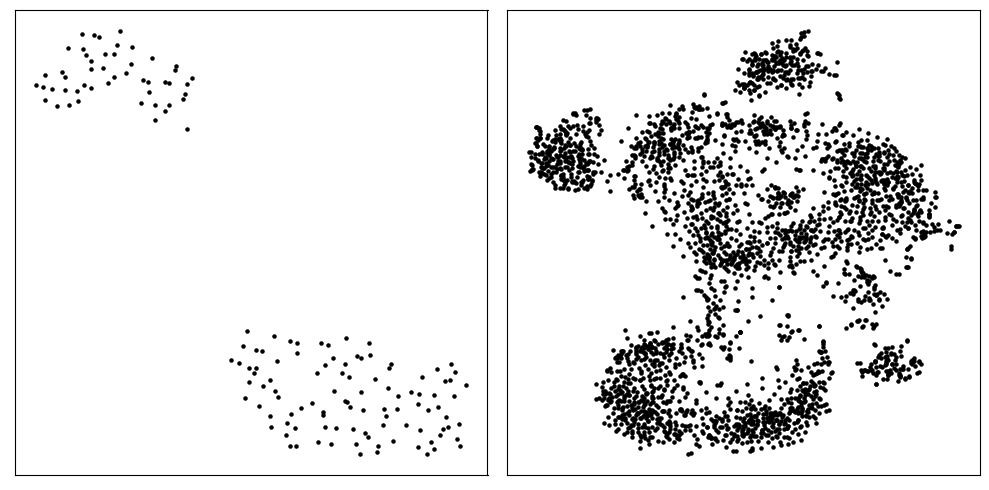

In [75]:
high_ambiguity_index = 0
low_ambiguity_index = 45

high_ambiguity_scatter = np.load(f"./scatterplots/{keys[high_ambiguity_index]}")
low_ambiguity_scatter = np.load(f"./scatterplots/{keys[low_ambiguity_index]}")

fig, ax = plt.subplots(1, 2 , figsize=(10, 5))

ax[0].scatter(high_ambiguity_scatter[:, 0], high_ambiguity_scatter[:, 1], s=5, c="black")
ax[1].scatter(low_ambiguity_scatter[:, 0], low_ambiguity_scatter[:, 1], s=5, c="black")

## remove ticks
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

print(ambiguities[high_ambiguity_index], ambiguities[low_ambiguity_index])

plt.tight_layout()
plt.savefig("./figures/high_and_low.pdf", dpi=300)
plt.savefig("./figures/high_and_low.png", dpi=300)

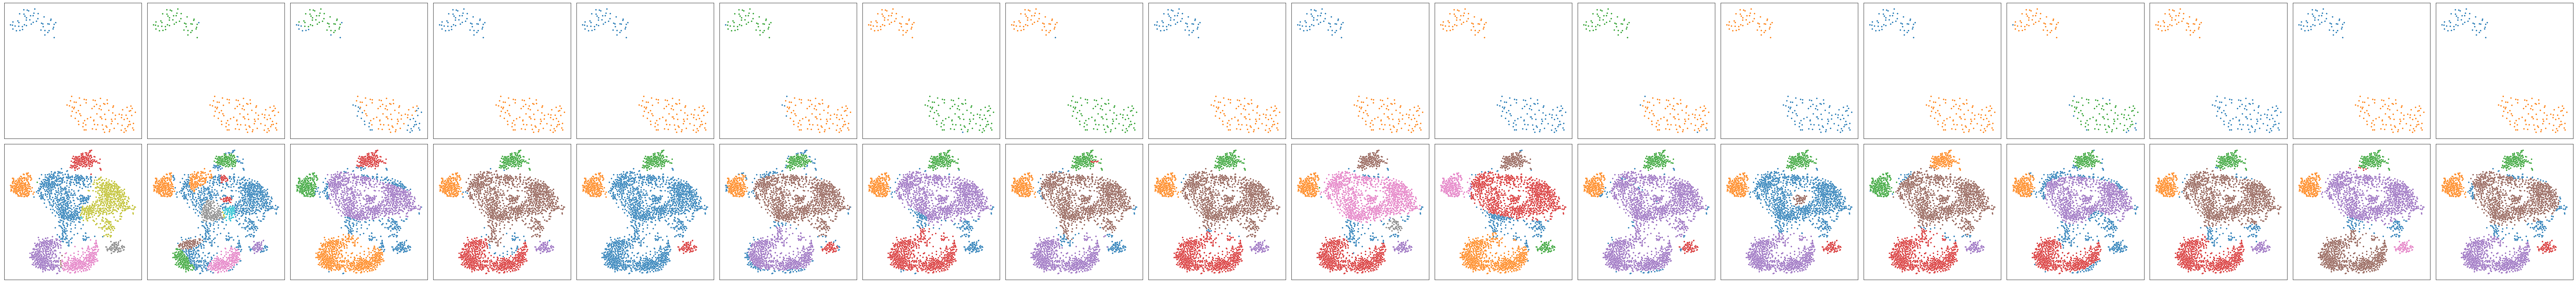

In [77]:
study_results = os.listdir("./study_result/")

def generate_label(lasso_result, length):
  label = ["-1"] * length
  for brushIdx in lasso_result:
    brush = lasso_result[brushIdx]
    for i, point in enumerate(brush):
      if point == True:
        if label[i] == "-1":
          label[i] = brushIdx
        else:
          label[i] += "_" + brushIdx
  
	## turn label into 0~n-1
  label = np.array(label)
  unique_label = np.unique(label)
  # print(unique_label)
  new_label = []
  for i, l in enumerate(label):
    new_label.append(np.where(unique_label == l)[0][0])


  label = np.array(new_label)
 
  return label

fig, ax = plt.subplots(2, len(study_results), figsize=(len(study_results) * 5, 10))

for i, study_result in enumerate(study_results):
  with open(f"./study_result/{study_result}") as f:
    result_data = json.load(f)
  lasso_result_high = result_data["lassoResult"][keys[high_ambiguity_index]]
  lasso_result_low = result_data["lassoResult"][keys[low_ambiguity_index]]
  
  label_high = generate_label(lasso_result_high, high_ambiguity_scatter.shape[0])
  label_low = generate_label(lasso_result_low, low_ambiguity_scatter.shape[0])

  sns.scatterplot(x=high_ambiguity_scatter[:, 0], y=high_ambiguity_scatter[:, 1], hue=label_high, ax=ax[0, i], s=15, legend=False, palette="tab10",)
  sns.scatterplot(x=low_ambiguity_scatter[:, 0], y=low_ambiguity_scatter[:, 1], hue=label_low, ax=ax[1, i], s=15, legend=False, palette="tab10")

  ax[0, i].set_yticks([])
  ax[1, i].set_xticks([])
  ax[1, i].set_yticks([])
  ax[0, i].set_xticks([])

plt.tight_layout()

plt.savefig("./figures/high_and_low_with_label.png", dpi=300)